In [1]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A


/home/michel/.local/lib/python3.10/site-packages/albumentations/check_version.py:107: UserWarning: Error fetching version info <urlopen error [Errno -2] Name or service not known>
  data = fetch_version_info()


In [2]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

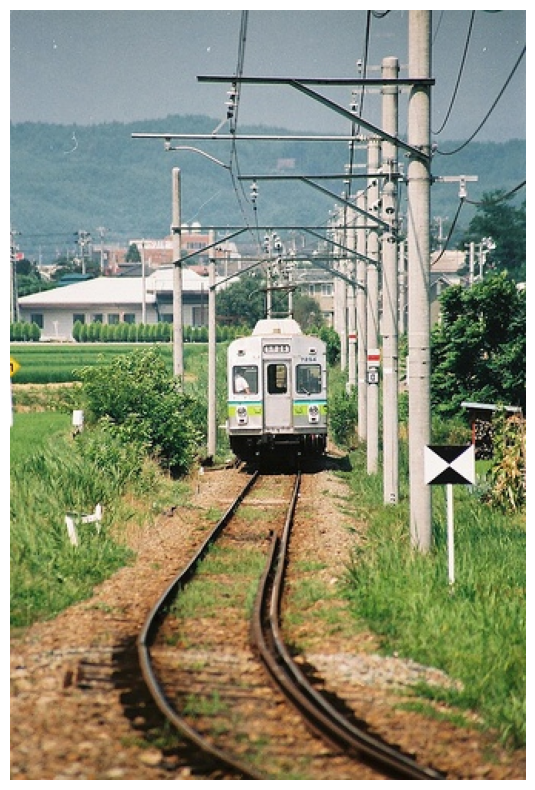

In [3]:
image = cv2.imread('images/000002.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

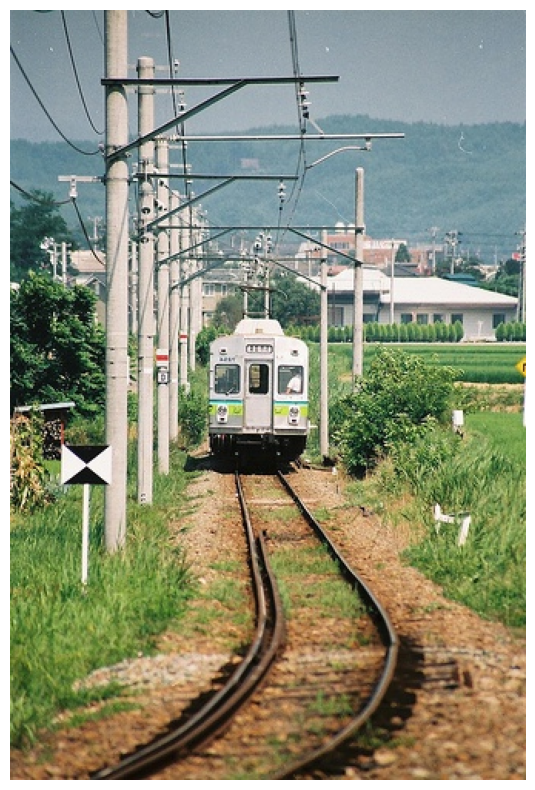

In [4]:
transform = A.HorizontalFlip(p=0.5)
random.seed(90)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

/home/michel/.local/lib/python3.10/site-packages/albumentations/core/validation.py:45: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


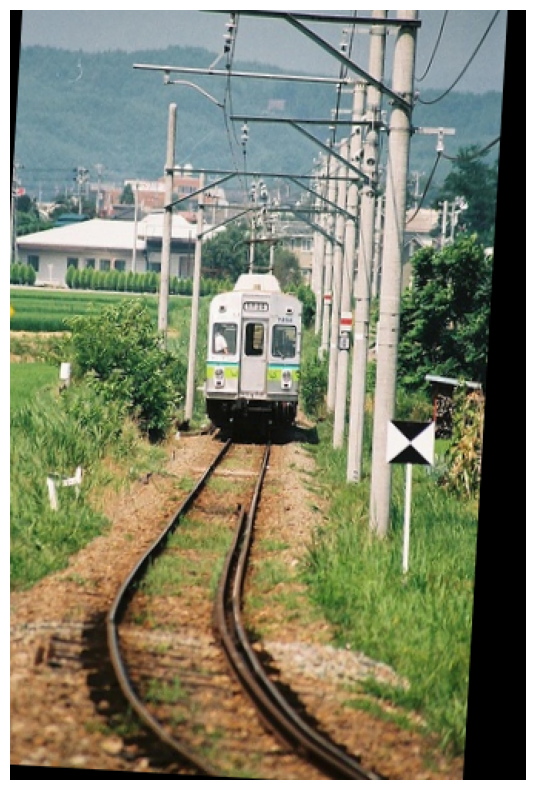

In [5]:
transform = A.ShiftScaleRotate(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

In [6]:
def augmentation_pipeline(image):
    augmented_images = []
    random.seed(7)
    
    transform = A.HorizontalFlip(p=0.5) # flips the image horizontally
    augmented_images.append(transform(image=image)['image'])

    transform = A.ShiftScaleRotate(p=0.5) # randomly apply transforms: translate, scale and rotate the input
    augmented_images.append(transform(image=image)['image'])
        
    transform = A.Transpose() # equivalent to 90 degrees rotation
    augmented_images.append(transform(image=image)['image'])
    
    transform = A.GaussNoise() # introduces noise to the image
    augmented_images.append(transform(image=image)['image'])

    return augmented_images

In [7]:
data = []
# load the dataset
for i in range(1,10):
    for j in range(0,7):
        image = cv2.imread("images/0000"+str(j)+str(i)+".jpg")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        with open("labels/0000"+str(j)+str(i)+".txt", "r") as f:
            lines = f.readlines()
            label_data = []
            for line in lines:
                parts = line.strip().split()
                label_data.append([parts[1], parts[2], parts[3], parts[4], parts[0]])
        data.append({"image": image, "label": label_data})


In [8]:
transform = A.Compose([
    A.ShiftScaleRotate(p=0.5), # randomly apply transforms: translate, scale and rotate the input
    A.HorizontalFlip(p=0.7), # has a chance of horizontally flipping the image
    A.RandomBrightnessContrast(p=0.7), # Randomly changes the brightness and contrast of the input image
], bbox_params=A.BboxParams(format='yolo'))

In [9]:
i = 1
colors = [(255,0,0), (0,255,0), (0,0,255)]
transformed_data = []

for item in data:
    
    transformed = transform(image=item["image"], bboxes=item["label"])
    image = transformed["image"]
    bboxes = transformed["bboxes"]
    transformed_data.append({"image": image, "bboxes": bboxes})
    
    total_height = image.shape[0]
    total_width = image.shape[1]
    j=0
    
    for bbox in bboxes:
        x0 = total_width*(bbox[0] - bbox[2]/2)
        x1 = total_width*(bbox[0] + bbox[2]/2)
        y0 = total_height*(bbox[1] - bbox[3]/2)
        y1 = total_height*(bbox[1] + bbox[3]/2)
        
        start_point = (int(x0), int(y0))
        end_point = (int(x1), int(y1))

        image = cv2.rectangle(image, start_point, end_point, color=colors[j], thickness=2)
        j=(j+1)%3
        
    cv2.imwrite("transformed_images/0000"+str(i)+".jpeg", image)
    i+=1
